In [1]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import iris
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
cubes = iris.load('/gws/nopw/j04/mcs_prime/mmuetz/data/UM_sims/u-db150/init_test/db150a.pa1988sep.pp')

/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1563: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1598: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/cf_units/__init__.py:411: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  dates = np.array([dt and dt.replace(microsecond=0) for dt in dates])
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [3]:
tcq = cubes.extract_cube(iris.AttributeConstraint(STASH='m01s30i461'))

In [4]:
tcq

<iris 'Cube' of m01s30i461 / (unknown) (time: 30; latitude: 144; longitude: 192)>

In [5]:
lat = tcq.coord('latitude')
lon = tcq.coord('longitude')

In [6]:
lat.points

array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875,
       -80.625, -79.375, -78.125, -76.875, -75.625, -74.375, -73.125,
       -71.875, -70.625, -69.375, -68.125, -66.875, -65.625, -64.375,
       -63.125, -61.875, -60.625, -59.375, -58.125, -56.875, -55.625,
       -54.375, -53.125, -51.875, -50.625, -49.375, -48.125, -46.875,
       -45.625, -44.375, -43.125, -41.875, -40.625, -39.375, -38.125,
       -36.875, -35.625, -34.375, -33.125, -31.875, -30.625, -29.375,
       -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
       -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875,
       -10.625,  -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,
        -1.875,  -0.625,   0.625,   1.875,   3.125,   4.375,   5.625,
         6.875,   8.125,   9.375,  10.625,  11.875,  13.125,  14.375,
        15.625,  16.875,  18.125,  19.375,  20.625,  21.875,  23.125,
        24.375,  25.625,  26.875,  28.125,  29.375,  30.625,  31.875,
        33.125,  34.

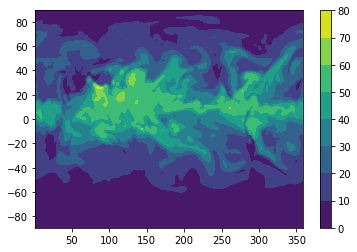

In [7]:
plt.contourf(lon.points, lat.points, tcq.data[0])
plt.colorbar()

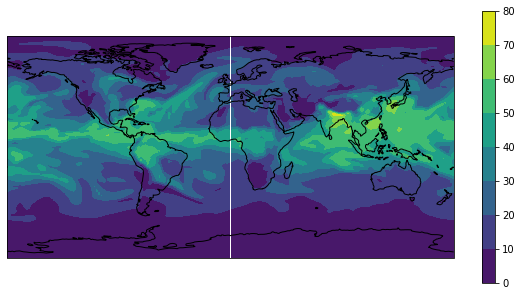

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((10, 5))
ax.coastlines()
im = ax.contourf(lon.points, lat.points, tcq.data[0])
plt.colorbar(im)

In [9]:
# https://stackoverflow.com/questions/56348136/white-line-in-contour-plot-in-cartopy-on-center-longitude
tcq_data, lon = add_cyclic_point(tcq.data[0], coord=tcq.coord('longitude').points)

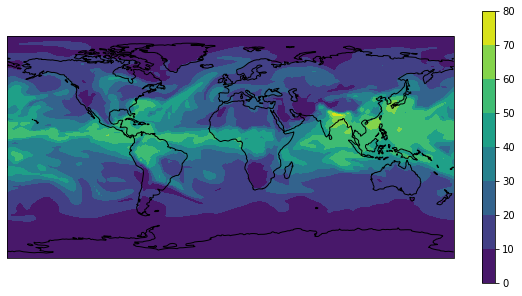

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((10, 5))
ax.coastlines()
im = ax.contourf(lon, lat.points, tcq_data)
plt.colorbar(im)

In [11]:
tcq[0]

<iris 'Cube' of m01s30i461 / (unknown) (latitude: 144; longitude: 192)>

In [12]:
def plot_tcq(tcq):
    tcq_data, lon = add_cyclic_point(tcq.data, coord=tcq.coord('longitude').points)
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    fig.set_size_inches((20, 9))
    ax.coastlines()
    im = ax.contourf(lon, lat.points, tcq_data)
    # Units are kg m-2 but this is almost exactly equiv to mm.
    plt.colorbar(im, label='TCWV (mm)')

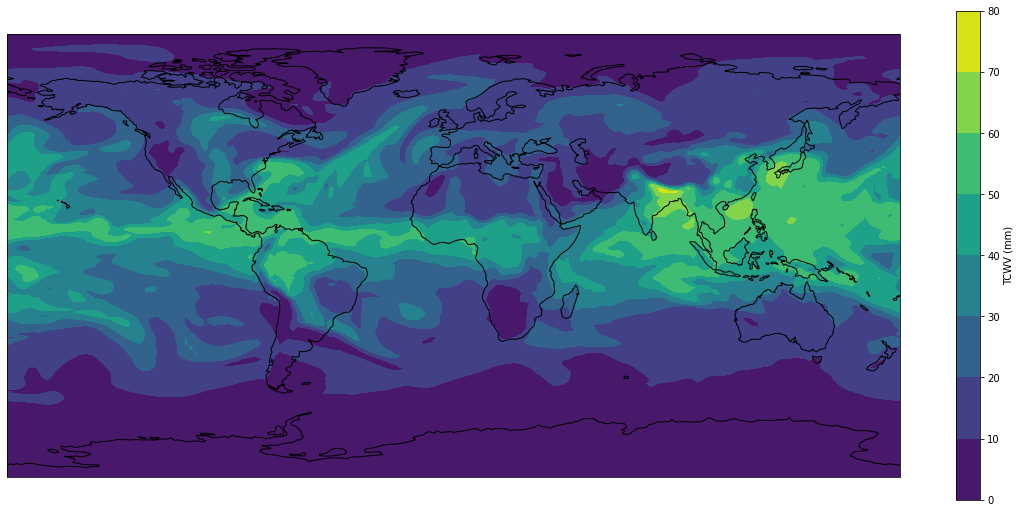

In [13]:
plot_tcq(tcq[0])

In [14]:
tcq_mean = tcq.collapsed('time', iris.analysis.MEAN)

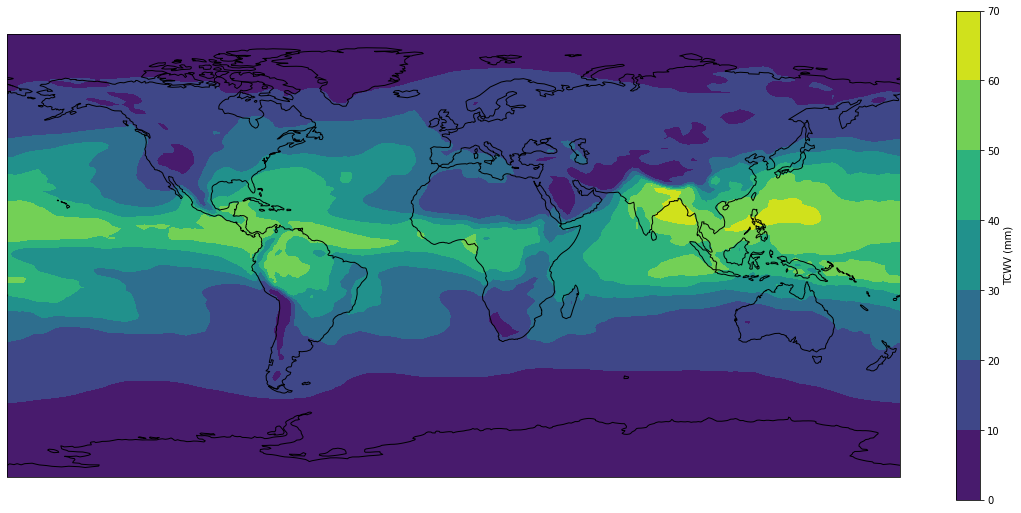

In [15]:
plot_tcq(tcq_mean)

In [19]:
tcq_mean.data.max()

65.98713

In [20]:
tcq.data.max()

74.82696